In [1]:
from time import time
import pandas as pd
import numpy as np
# SVM para regresión
from sklearn.svm import SVR
# métricas de rendimiento
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/datos_limpios.csv')
df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,SeniorCitizen,MonthlyCharges
0,0,1,0,0,1,0,0,29.85
1,1,0,0,1,0,0,0,56.95
2,1,0,0,1,0,0,0,53.85
3,1,0,0,0,1,0,0,42.30
4,0,0,0,1,0,1,0,70.70


In [4]:
# Empezamos definiendo cuál será nuestra columna objetivo (y), que en este caso es MonthlyCharges.
X = df.iloc[:, 0:len(df.columns) - 1]
y = df[['MonthlyCharges']]

In [5]:
y.head()

,MonthlyCharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70


In [6]:
# Separamos un set de datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
# Defenimos nuestro algoritmo de regresión
regresion = SVR(kernel='poly', degree=5)
hora_inicio = time()

# Entrenamiento del algoritmo
regresion.fit(X_train.values, y_train.values.ravel())
print(f'Entrenamiento finalizado en {time() - hora_inicio} segundos')

Entrenamiento finalizado en 1.3829197883605957 segundos


In [ ]:
X_train.info()

In [ ]:
# Hagamos una serie de predicciones con los datos de prueba
y_pred = regresion.predict(X_test)

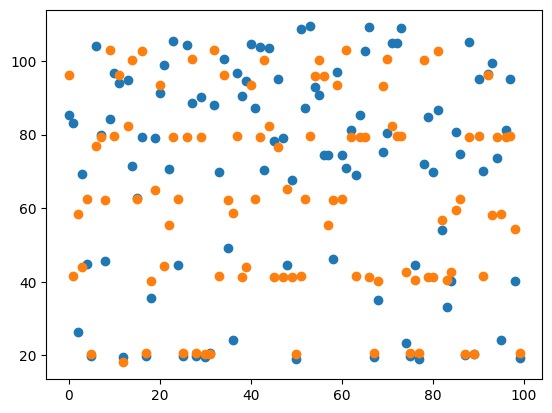

In [12]:
# Lineal
cantidad_probar = 100
X_axis = np.arange(cantidad_probar)

fig, ax = plt.subplots()
ax.scatter(X_axis, y_test.iloc[0:cantidad_probar].values)
ax.scatter(X_axis, y_pred[0:cantidad_probar])
plt.show()

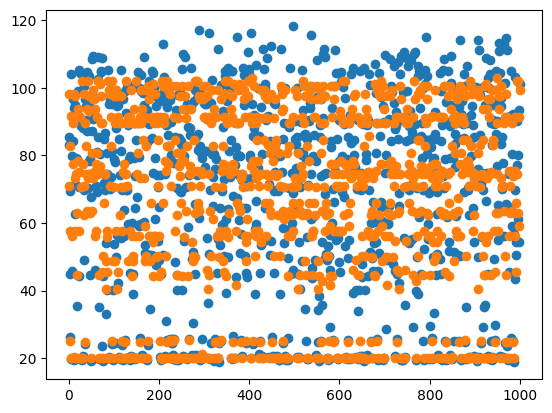

In [19]:
# Polinomial
cantidad_probar = 1000
X_axis = np.arange(cantidad_probar)

fig, ax = plt.subplots()
ax.scatter(X_axis, y_test.iloc[0:cantidad_probar].values)
ax.scatter(X_axis, y_pred[0:cantidad_probar])
plt.show()

In [17]:
r2_score(y_test, y_pred) # Lineal

0.8679364918406819

In [18]:
r2_score(y_test, y_pred) # Polinomial

0.8679364918406819